In [1]:
import pandas as pd

#Import the data into the model 
data = pd.read_csv("C:\Users\angie\OneDrive\Desktop\Final Project\Final_Project_GHRacingPredictor_App\data\data_final.csv")
data.head()


,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,...,Odds_380,Early_380,Grade_380,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By,Winner
0,0,6,2.75,4.0,1,12,456.47,4.09,402.86,17,...,4.38,2.00,4.00,17.84,3.63,0.50,6.0,0.00,-10.50,0
1,0,3,5.00,7.6,4,5,410.48,3.53,414.00,21,...,4.04,3.43,3.29,24.18,3.70,0.28,6.0,0.14,-4.71,1
2,0,5,5.00,9.4,6,9,386.45,3.39,380.00,31,...,4.46,3.43,3.71,24.06,3.67,-0.43,6.0,0.00,-2.86,0
3,0,4,7.00,7.8,5,9,380.00,3.03,380.00,21,...,5.46,2.43,4.43,24.14,3.65,0.28,6.0,0.00,-2.71,0
4,0,2,5.00,5.1,2,13,385.00,2.59,388.33,40,...,4.18,3.14,2.71,24.05,3.64,-0.43,6.0,0.00,-2.32,0


In [2]:
#Feature 1: Probability according to odds
data['implied_probability'] = 1 / data['Odds']

#Feature 2: Win Percentage
data['win_percentage'] = data['Finish_All'] / data['Races_All']

#Feature 3: Correlation between odds and public opinion
data['BSP_Odds_PublicEstimate'] = data['BSP'] + data['Odds'] / data['Public_Estimate']

#Display dataset with new features
print(data.head())

   Race_ID  Trap  Odds  BSP  Public_Estimate  Last_Run  Distance_All  \
0        0     6  2.75  4.0                1        12        456.47   
1        0     3  5.00  7.6                4         5        410.48   
2        0     5  5.00  9.4                6         9        386.45   
3        0     4  7.00  7.8                5         9        380.00   
4        0     2  5.00  5.1                2        13        385.00   

   Finish_All  Distance_Places_All  Races_All  ...  Time_380  Early_Time_380  \
0        4.09               402.86         17  ...     17.84            3.63   
1        3.53               414.00         21  ...     24.18            3.70   
2        3.39               380.00         31  ...     24.06            3.67   
3        3.03               380.00         21  ...     24.14            3.65   
4        2.59               388.33         40  ...     24.05            3.64   

   Stay_380  Favourite  Wide_380  Dist_By  Winner  implied_probability  \
0      0.50 

In [3]:
#Display the dataset's information
data.info()

#Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Race_ID                  12006 non-null  int64  
 1   Trap                     12006 non-null  int64  
 2   Odds                     12006 non-null  float64
 3   BSP                      12006 non-null  float64
 4   Public_Estimate          12006 non-null  int64  
 5   Last_Run                 12006 non-null  int64  
 6   Distance_All             12006 non-null  float64
 7   Finish_All               12006 non-null  float64
 8   Distance_Places_All      12006 non-null  float64
 9   Races_All                12006 non-null  int64  
 10  Distance_Recent          12006 non-null  float64
 11  Finish_Recent            12006 non-null  float64
 12  Odds_Recent              12006 non-null  float64
 13  Early_Recent             12006 non-null  float64
 14  Races_380             

In [4]:
#Show descriptive statistics 
data.describe()

,Race_ID,Trap,Odds,BSP,Public_Estimate,Last_Run,Distance_All,Finish_All,Distance_Places_All,Races_All,...,Time_380,Early_Time_380,Stay_380,Favourite,Wide_380,Dist_By,Winner,implied_probability,win_percentage,BSP_Odds_PublicEstimate
count,12006.00000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,...,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,1000.00000,3.500000,5.371940,7.600623,3.501916,7.149592,400.232647,3.666011,399.435106,62.054223,...,24.042455,3.703312,-0.058871,3.442533,0.068360,-4.473741,0.166667,0.213544,0.132855,9.401717
std,577.66293,1.707896,2.208432,4.255454,1.706236,3.346557,28.816968,0.527866,28.957759,56.200429,...,1.290984,0.061315,1.089164,1.744878,0.152352,3.036172,0.372694,0.076401,0.155583,4.058738
min,0.00000,1.000000,1.670000,1.830000,1.000000,2.000000,306.670000,1.830000,307.570000,2.000000,...,0.000000,3.500000,-5.000000,1.000000,0.000000,-50.000000,0.000000,0.047619,0.007273,3.560000
25%,500.00000,2.000000,4.000000,4.610000,2.000000,5.000000,380.000000,3.320000,380.000000,23.000000,...,24.120000,3.660000,-0.800000,2.000000,0.000000,-5.430000,0.000000,0.166667,0.042066,6.833333
50%,1000.00000,3.500000,5.000000,6.400000,4.000000,7.000000,389.520000,3.610000,388.000000,44.000000,...,24.310000,3.700000,0.000000,3.000000,0.000000,-4.000000,0.000000,0.200000,0.082442,8.066667
75%,1500.00000,5.000000,6.000000,9.290000,5.000000,8.000000,413.995000,3.920000,412.967500,84.000000,...,24.510000,3.740000,0.710000,5.000000,0.068085,-2.750000,0.000000,0.250000,0.160000,10.640000
max,2000.00000,6.000000,21.000000,44.000000,6.000000,28.000000,573.160000,7.270000,579.550000,462.000000,...,25.660000,4.210000,5.000000,6.000000,1.000000,11.000000,1.000000,0.598802,1.875000,47.500000


In [5]:
# Check for missing values within the dtatset
data.isnull().sum()

Race_ID                    0
Trap                       0
Odds                       0
BSP                        0
Public_Estimate            0
Last_Run                   0
Distance_All               0
Finish_All                 0
Distance_Places_All        0
Races_All                  0
Distance_Recent            0
Finish_Recent              0
Odds_Recent                0
Early_Recent               0
Races_380                  0
Wins_380                   0
Finish_380                 0
Odds_380                   0
Early_380                  0
Grade_380                  0
Time_380                   0
Early_Time_380             0
Stay_380                   0
Favourite                  0
Wide_380                   0
Dist_By                    0
Winner                     0
implied_probability        0
win_percentage             0
BSP_Odds_PublicEstimate    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

#Initialize the LabelEncoder
le = LabelEncoder()

#Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

#Verify the transformation
print(data.info())
print(data.head())

#Normalize/Standardize Features

features = data.columns.difference(['Winner'])

#Identify features to scale (excluding the target variable 'Winner')
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

#Verify scaling
print(data.head())

Categorical columns: Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Race_ID                  12006 non-null  int64  
 1   Trap                     12006 non-null  int64  
 2   Odds                     12006 non-null  float64
 3   BSP                      12006 non-null  float64
 4   Public_Estimate          12006 non-null  int64  
 5   Last_Run                 12006 non-null  int64  
 6   Distance_All             12006 non-null  float64
 7   Finish_All               12006 non-null  float64
 8   Distance_Places_All      12006 non-null  float64
 9   Races_All                12006 non-null  int64  
 10  Distance_Recent          12006 non-null  float64
 11  Finish_Recent            12006 non-null  float64
 12  Odds_Recent              12006 non-null  float64
 13  Early_Recent             1200

In [7]:
from sklearn.model_selection import train_test_split

#Define features (X) and target variable (y)
X = data.drop('Winner', axis=1)  # Features
y = data['Winner']  # Target variable

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Verify the split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

#Ensure no overlap between trainining and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Winner', axis=1), data['Winner'], test_size=0.2, random_state=42)
train_indices = set(X_train.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)
print(f"Number of overlapping data between train and test sets: {len(overlap)}")

Training set size: (9604, 29)
Test set size: (2402, 29)
Number of overlapping data between train and test sets: 0



Correlation matrix:
                              Race_ID          Trap      Odds       BSP  \
Race_ID                  1.000000e+00 -3.144060e-19  0.007352  0.015184   
Trap                    -3.144060e-19  1.000000e+00 -0.039046 -0.010928   
Odds                     7.351773e-03 -3.904637e-02  1.000000  0.873613   
BSP                      1.518420e-02 -1.092826e-02  0.873613  1.000000   
Public_Estimate          1.073486e-03  8.575481e-05  0.755081  0.804775   
Last_Run                 1.286354e-02 -8.773535e-03  0.075256  0.072149   
Distance_All            -6.403728e-03 -7.081980e-02  0.061957  0.059474   
Finish_All              -1.022402e-02  8.525830e-03  0.079152  0.090383   
Distance_Places_All     -2.840361e-03 -7.289194e-02  0.061931  0.059333   
Races_All               -7.481375e-04 -1.243172e-03  0.145791  0.156367   
Distance_Recent         -1.851498e-03 -3.430420e-02  0.068676  0.071785   
Finish_Recent           -7.483032e-03  4.959975e-03  0.101733  0.104114   
Odds

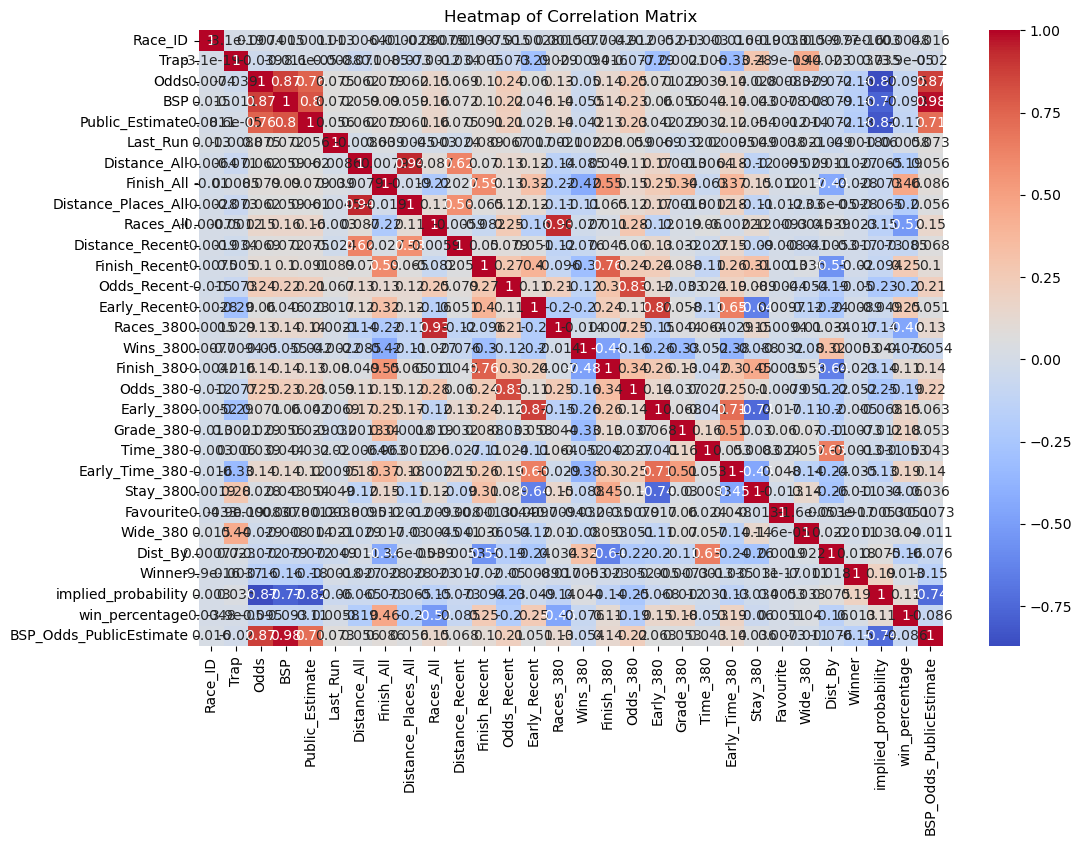


Scatter plot for selected features:


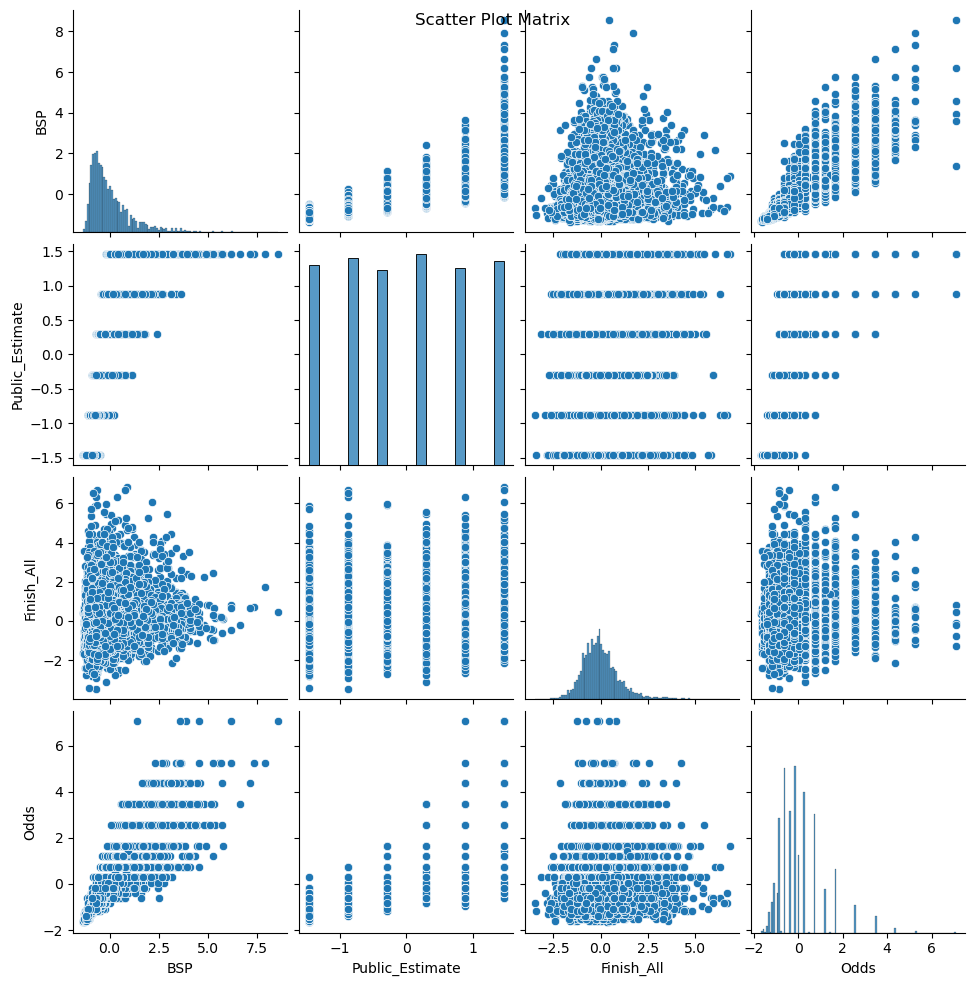

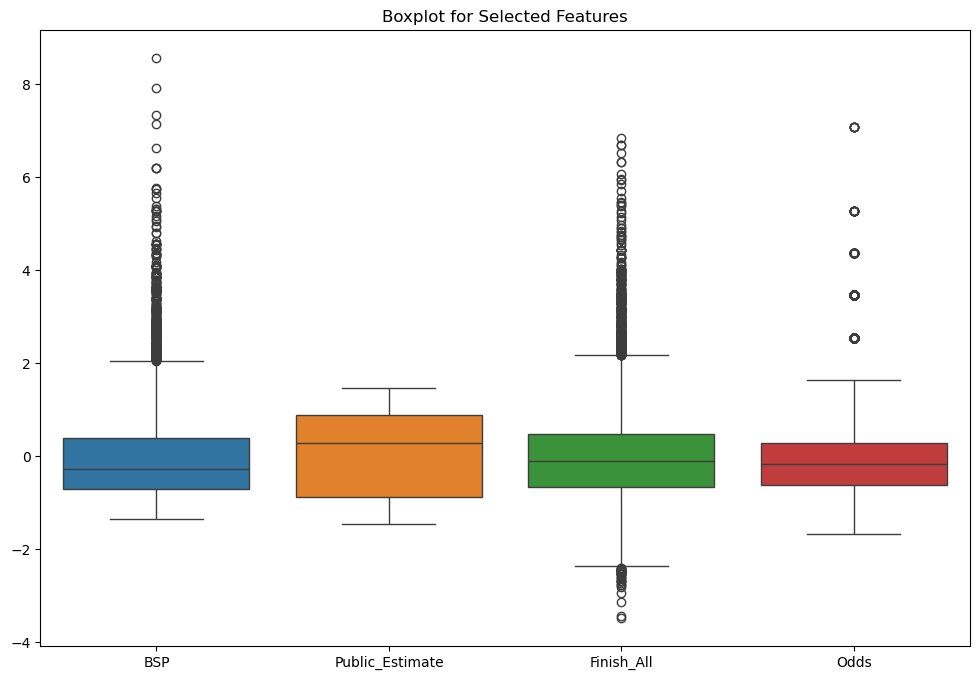

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation matrix
corr_matrix = data.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

#Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#Scatter plot for selected features
selected_features = ['BSP', 'Public_Estimate', 'Finish_All', 'Odds'] 
print("\nScatter plot for selected features:")
sns.pairplot(data[selected_features])
plt.suptitle('Scatter Plot Matrix')
plt.show()

#Boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[selected_features])
plt.title('Boxplot for Selected Features')
plt.show()

In [9]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Apply SMOTE to the training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Feature Scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#CatBoost Model with GridSearchCV
catboost_param_grid = {
    'iterations': [200],
    'depth': [10],
    'learning_rate': [0.1],
    'scale_pos_weight': [5]
}

catboost = CatBoostClassifier(random_state=42, verbose=0)
catboost_grid = GridSearchCV(catboost, param_grid=catboost_param_grid, cv=5, scoring='accuracy')
catboost_grid.fit(X_train_resampled, y_train_resampled)

y_pred = catboost_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"CatBoost Test Accuracy: {accuracy:.4f}")
print(f"CatBoost Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
print(f"CatBoost Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

CatBoost Test Accuracy: 0.7163
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3002
           1       0.25      0.36      0.30       600

    accuracy                           0.72      3602
   macro avg       0.56      0.58      0.56      3602
weighted avg       0.76      0.72      0.74      3602

CatBoost Confusion Matrix:
[[2361  641]
 [ 381  219]]



In [10]:
from sklearn.svm import SVC

#SVM with GridSearchCV
svm_param_grid = {
    'C': [10],
    'gamma': [0.1],
    'kernel': ['linear'],
    'class_weight': ['balanced']
}

svm = SVC(probability=True, random_state=42)
svm_grid = GridSearchCV(svm, param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train_resampled, y_train_resampled)


y_pred = svm_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Test Accuracy: {accuracy:.4f}")
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
print(f"SVM Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

SVM Test Accuracy: 0.5894
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      3002
           1       0.24      0.67      0.35       600

    accuracy                           0.59      3602
   macro avg       0.57      0.62      0.53      3602
weighted avg       0.79      0.59      0.64      3602

SVM Confusion Matrix:
[[1721 1281]
 [ 198  402]]



In [11]:
from xgboost import XGBClassifier

#XGBoost with GridSearchCV
xgb_param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [7],
    'scale_pos_weight': [5]
}

xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_grid = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Test Accuracy: {accuracy:.4f}")
print(f"XGBoost Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
print(f"XGBoost Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

XGBoost Test Accuracy: 0.7460
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3002
           1       0.26      0.27      0.26       600

    accuracy                           0.75      3602
   macro avg       0.55      0.56      0.56      3602
weighted avg       0.75      0.75      0.75      3602

XGBoost Confusion Matrix:
[[2523  479]
 [ 436  164]]



In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


#Ensemble Stacking Model - call all the models
estimators = [
    ('catboost', catboost_grid.best_estimator_),
    ('svm', svm_grid.best_estimator_),
    ('xgb', xgb_grid.best_estimator_)
]

#Set LR as the meta-learner for the stacking model
stacking = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(max_iter=5000, class_weight='balanced')
)
stacking.fit(X_train_resampled, y_train_resampled)

y_pred = stacking.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Test Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
print(f"Stacking Classifier Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

#ROC/AUC Score
y_prob = stacking.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Stacking Classifier ROC AUC Score: {roc_auc:.2f}")

Stacking Classifier Test Accuracy: 0.7707
Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3002
           1       0.29      0.25      0.27       600

    accuracy                           0.77      3602
   macro avg       0.57      0.56      0.57      3602
weighted avg       0.76      0.77      0.76      3602

Stacking Classifier Confusion Matrix:
[[2625  377]
 [ 449  151]]

Stacking Classifier ROC AUC Score: 0.62


In [ ]:
from sklearn.model_selection import cross_val_score

#Perform 5-fold cross-validation
model = stacking
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())